In [1]:
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df=load_dataset('lukebarousse/data_jobs',split='train').to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_us=df[df['job_country']=='United States'].dropna(subset=['salary_year_avg'])
job_titles= df_us['job_title'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst']

In [3]:
df_us_top6= df_us[df_us['job_title_short'].isin(job_titles)]
df_us_top6

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [4]:
df_grouped = (
    df_us_top6
    .groupby('job_title_short')['salary_year_avg']
    .median()
    .sort_values(ascending=False)
)
order = list(df_grouped.index)
# can achieve the same by using ordered=order arguement in sns.boxplot
df_us_top6['job_title_short']=pd.Categorical(df_us_top6['job_title_short'],categories=order, ordered=True)
df_us_top6.sort_values('job_title_short', inplace=True)
df_us_top6.head(5)

/tmp/ipykernel_1860/1351946041.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_top6['job_title_short']=pd.Categorical(df_us_top6['job_title_short'],categories=order, ordered=True)
/tmp/ipykernel_1860/1351946041.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_top6.sort_values('job_title_short', inplace=True)


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
616582,Senior Data Scientist,"Sr. Data Scientist, Ads Experimentation","Palo Alto, CA",via Ladders,Full-time,False,"California, United States",2023-12-17 12:02:45,False,False,United States,year,199641.0,NaN,Pinterest,None,None
63366,Senior Data Scientist,"VP, Data Remediation (Intake) - ICG Chief Data...","Dallas, TX",via Ladders,Full-time,False,"Texas, United States",2023-04-24 06:01:05,False,False,United States,year,150000.0,NaN,"Citigroup, Inc",None,None
63306,Senior Data Scientist,Senior Data Scientist - Product Analytics,"Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-11 06:05:08,False,True,United States,year,196800.0,NaN,TikTok,"[sql, python]","{'programming': ['sql', 'python']}"
63192,Senior Data Scientist,Senior Data Scientist,"Chantilly, VA",via BeBee,Full-time,False,"New York, United States",2023-11-27 06:03:17,False,True,United States,year,125000.0,NaN,KBR,"[r, python, crystal, tableau, excel, word, pow...","{'analyst_tools': ['tableau', 'excel', 'word',..."
164133,Senior Data Scientist,Senior Data Scientist - PDPO,"San Jose, CA",via LinkedIn,Full-time,False,"California, United States",2023-12-05 15:02:54,False,True,United States,year,252844.0,NaN,TikTok,"[r, linux, tableau, git]","{'analyst_tools': ['tableau'], 'os': ['linux']..."


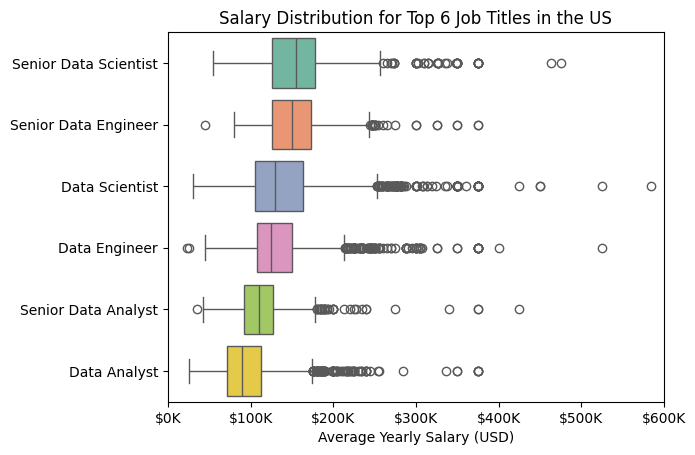

In [5]:
sns.boxplot(data=df_us_top6, x='salary_year_avg', y='job_title_short',hue='job_title_short', palette='Set2',legend=False)
plt.title('Salary Distribution for Top 6 Job Titles in the US')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0,600000)
plt.xticks(range(0,650000,100000), labels=[f'${x/1000:.0f}K' for x in range(0,650000,100000)])
plt.show()

In [6]:
#Median Salry VS skill for data analyst in US
df_us_da=df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].dropna(subset=['salary_year_avg'])
df_exploaded =df_us_da.explode('job_skills')

In [7]:
#high paying skills
df_pay=(df_exploaded.groupby('job_skills')['salary_year_avg']
            .agg(['median','count'])
            .sort_values(by='median',ascending=False)
            .head(10)
            )
df_pay

,median,count
job_skills,,
dplyr,196250.0,2
bitbucket,189000.0,3
gitlab,186000.0,3
solidity,179000.0,1
hugging face,175000.0,1
couchbase,160515.0,1
ansible,159640.0,1
mxnet,149000.0,2
cassandra,148250.0,6


In [8]:
#demanding skills
df_popular=(df_exploaded.groupby('job_skills')['salary_year_avg']
            .agg(['median','count'])
            .sort_values(by='count',ascending=False)
            .head(10)
            )
df_popular

,median,count
job_skills,,
sql,91000.00,2508
excel,84392.00,1808
python,97500.00,1431
tableau,92875.00,1364
sas,90000.00,926
r,92500.00,893
power bi,90000.00,838
powerpoint,85000.00,462
word,81194.75,461


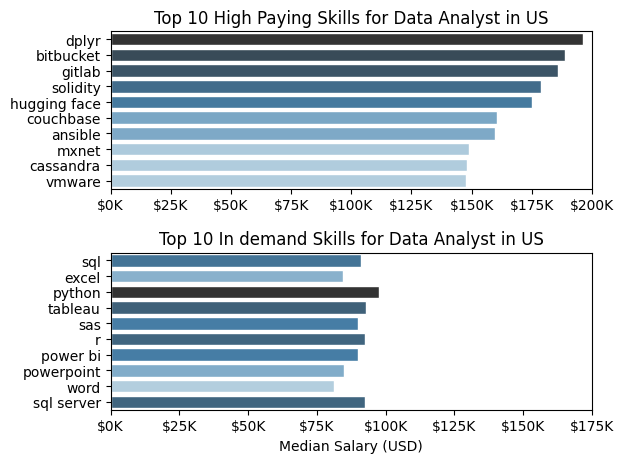

In [9]:
#Visualization a
fig,ax= plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data=df_pay,y=df_pay.index,x='median',ax=ax[0],palette='Blues_d',hue='median',legend=False)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title('Top 10 High Paying Skills for Data Analyst in US',fontsize=12)
ax[0].set_xticks(range(0,225000,25000), labels=[f'${x/1000:.0f}K' for x in range(0,225000,25000)])
ax[0].set_xlim(0,200000)
#Visualization b
sns.barplot(data=df_popular,y=df_popular.index,x='median',ax=ax[1],palette='Blues_d',hue='median',legend=False)
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)',fontsize=10)
ax[1].set_title('Top 10 In demand Skills for Data Analyst in US',fontsize=12)
ax[1].set_xticks(range(0,200000,25000), labels=[f'${x/1000:.0f}K' for x in range(0,200000,25000)])
fig.tight_layout()
figuresize=(10,10)
plt.show()